# Projekt: Kartografierung des Sonnensystems

 * 29. Juni 2021 - 02. Juli, 2021
 
 * Team: 
     - Natalia Beller 
 
     - Maximilian Behr
 
     - Matthias Faß
 
## Projektbeschreibung

In unserem Sonnensystem sind, Stand 17. August 2020, bereits 991,909 Asteroiden bekannt
(Quelle: link). Ziel dieses Projekts ist es, zu untersuchen, ob sich mit den Methoden
des Machine Learning die Kartografierung des Sonnensystems erleichtern lässt. Dazu untersuchen
Sie, ob sich die Größe von Asteroiden anhand anderer Kenngrößen vorhersagen
lässt. Betrachten Sie dazu den folgenden öffentlich verfügbaren Datensatz, der auf der
Datenbank des Jet Propulsion Laboratory der NASA beruht: Asteroid Dataset.
Neben verschiedenen anderen Kenngrößen, mit denen Sie sich selbstständig vertraut
machen sollen, enthält der Datensatz für jeden Asteroid eine Variable diameter, also den
Durchmesser des Himmelskörpers, der die Zielvariable Ihres Vorhersagemodells sein soll.
Ihre Aufgabe ist es, eine Exploration des Datensatzes vorzunehmen und anschließend
mit einem geeigneten Modell die diameter-Variable vorherzusagen. Neben einem Modell
sollen Sie auch eine Einschätzung der Generalisierungsfähigkeit des Modells bereitstellen,
sowie einen Bericht ausarbeiten, der Ihr Vorgehen und ihre Entscheidungen dokumentiert.

## Aufgaben

1. **Datenexploration** Explorieren Sie die Daten auf eine in Ihren Augen geeignete
Weise. Folgende Aspekte könnten unter anderem dabei relevant sein:
   - Dateiformat(e), Anzahl der Datenpunkte und Messwerte
   - Art der Messwerte und Verteilungen der Messwerte
   - Missing Values
   - Korrelationen zwischen den Features und zwischen den Features und der Zielvariablen.
2. **Datenrepräsentation** Repräsentieren Sie die Daten auf eine für Ihr Modell geeignete
Weise. Untersuchen Sie, welche Vorverarbeitungen sinnvoll oder nötig sind.
3. **Training** Trainieren Sie eines oder mehrere Modelle zur Vorhersage der Zielvariablen.
4. **Evaluation** Evaluieren Sie das Modell und schätzen Sie die Generalisierungsfähigkeit
des Modells. Diskutieren Sie das Ergebnis in Hinblick auf Over- bzw. Underfitting.
5. *__Bonus__ Einige der Merkmale im Datensatz sollten eigentlich nicht für die Vorhersage
verwendet werden. Untersuchen Sie den Teil der Daten, für die die Zielvariable
unbekannt ist, in Hinblick auf fehlende Werte. Was fällt Ihnen auf? Recherchieren
Sie, wie der Durchmesser von Asteroiden normalerweise bestimmt wird.
Warum sollten bestimmte Merkmale eigentlich nicht verwendet werden? Treffen
Sie eine Vorhersage auf dem Teil der Daten mit unbekannter Zielvariable. Vergleichen
Sie Modelle mit und ohne diese Merkmale.*

## Ergebnisse

Einzureichen und vorzubereiten sind:
- Code (Jupyter-Notebook)
- Bericht (Jupyter-Notebook)
- Präsentation (5-7 Minuten)

Die Ergebnisse Ihrer Untersuchungen sollten Sie in einem Bericht zusammenfassen. Dieser
Bericht sollte sowohl Ihre Vorgehensweise als auch Ihren Code dokumentieren. Verwenden
Sie dafür am besten ein Jupyter-Notebook, das Sie einmal als Notebook (.ipynb)
und einmal als .html einreichen.
Neben lesbarem und gut dokumentiertem Code sollten aus Ihrem Bericht auch Ihre
Entscheidungsprozesse hervorgehen. Dokumentieren Sie stets, für welches Vorgehen Sie
sich entschieden haben und warum. Dazu gehört zum Beispiel:

- Welche Explorationen haben Sie vorgenommen und warum?
- Haben Sie sämtliche Daten verwendet oder nur einen Teil? Warum oder warum
nicht?
- War es nötig die Daten vorzuverarbeiten? Auf welche Weise? Warum oder warum
nicht? Wie hängt das mit dem Modell zusammen?
- Für welches Modell haben Sie sich entschieden und warum? Handelt es sich bei dem
Problem um eine Regression oder Klassifikation? Welche Hyperparameter haben
Sie wie eingestellt und warum? Haben Sie mehrere Modelle getestet? Warum oder
warum nicht?
- Auf welche Weise haben Sie die Generalisierung geschätzt? Welche Metrik haben
Sie verwendet? Welche Alternativen gibt es?

Präsentieren Sie anschließend Ihre Ergebnisse auf Grundlage Ihres Notebooks den anderen
TeilnehmerInnen (5-7 Minuten Präsentationszeit).

In [1]:
# Importe
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

In [2]:
def show_result(name, y_train, y_pred_train, y_valid, y_pred_valid):
    print(f"--- {name} ---")
    print(f"RMSE Train = {np.round(mean_squared_error(y_train, y_pred_train, squared=False), 3)}")
    print(f"RMSE Validierung = {np.round(mean_squared_error(y_valid, y_pred_valid, squared=False), 3)}")
    print("---------------------------------")
    print(f"R2 Train = {np.round(r2_score(y_train, y_pred_train), 3)}")
    print(f"R2 Validierung= {np.round(r2_score(y_valid, y_pred_valid), 3)}")

In [3]:
def show_generalized_error(name, y_test, y_pred_test):
    
    r2 = np.round(r2_score(y_test, y_pred_test), 3)
    
    print(f"--- {name} ---")
    print("R2 Test =", r2)
    
    return (name, r2)
    

In [221]:
def plot_predicted_diameter(model_name, diameter_predicted):
    print("Mean 'diameter' =", np.round(np.mean(np.power(10, diameter_predicted)), 3), "km.")
    print("Std 'diameter' =", np.round(np.std(np.power(10, diameter_predicted)), 3), "km.")

    diameter_predicted_30 = np.random.choice(diameter_predicted, size = int(len(diameter_predicted) * 0.30), replace = False)

    plt.figure(figsize=(10, 8))
    sns.displot(diameter_predicted_30).set_xlabels("np.log(diameter)")
    plt.xscale('log')
    plt.title(f"Predicted 'diameter' - {model_name}")

# Supervised learning

## Datenexploration

* Erste Datensichtung und vom Team getroffene Vorauswahl
* Features mit sehr vielen missing values erstmal zum Entfernen vorgemerkt
* Diskussion über Bedeutung, Wichtigkeit von Daten


| Art | Variable | Beschreibung | Vorauswahl |
| :---: | :---: | :---: | :---: |
| N | name | Object full name | - |
| # | a | semi-major axis(au) | + |
| # | e | eccentricity | + |
| # | i | Inclination with respect to x-y ecliptic plane(deg) | + |
| # | om | Longitude of the ascending node | + |
| # | w | argument of perihelion | + |
| # | q | perihelion distance(au) | + |
| # | ad | aphelion distance(au) | + |
| # | per_y | Orbital period(YEARS) | + |
| # | data_arc | data arc-span(d) | + |
| O | condition_code | Orbit condition code | + |
| # | n_obs_used | number of observations used | + |
| # | H | Absolute Magnitude parameter | + |
| N | neo | Near Earth Object | + |
| N | pha | Physically Hazardous Asteroid | + |
| # | diameter | Diameter of asteroid(Km) | + |
| # | extent | Object bi/tri axial ellipsoid dimensions(Km) | - |
| # | albedo | geometric albedo | + - |
| # | rot_per | Rotation Period(h) | + |
| # | GM | Standard gravitational parameter, Product of mass and gravitational constant | - |
| # | BV | Color index B-V magnitude difference | - |
| # | UB | Color index U-B magnitude difference | - |
| # | IR | Color index I-R magnitude difference | - |
| N | spec_B | Spectral taxonomic type(SMASSII) | - |
| N | spec_T | Spectral taxonomic type(Tholen) | - |
| # | G | Magnitude slope parameter | - |
| # | moid | Earth Minimum orbit Intersection Distance(au) | + |
| N | class | asteroid orbit class (material) | + |
| # | n | Mean motion(deg/d) | + |
| # | per | orbital Period(d) | + |
| # | ma | Mean anomaly(deg) | + |


### Daten einlesen

In [4]:
df = pd.read_csv("../data/Asteroid_Updated.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

### Auswahl der Werte mit und ohne 'diameter'

In [5]:
data_ohne_diameter = df.loc[df.loc[:, "diameter"].isnull(),:]
data_ohne_diameter.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,...,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,...,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,...,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,...,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,...,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [6]:
# entferne Zeilen mit unbekannten diameter
data = df.loc[df.loc[:, "diameter"].notnull(),:]
data.reset_index(drop=True)

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137631,NaN,3.171225,0.159119,27.098625,309.036573,19.746812,2.666623,3.675826,5.647402,2373.0,...,NaN,NaN,NaN,NaN,NaN,1.66301,MBA,0.174527,2062.713583,164.999439
137632,NaN,2.548410,0.076071,11.593237,246.298656,170.090810,2.354549,2.742270,4.068291,3297.0,...,NaN,NaN,NaN,NaN,NaN,1.36733,MBA,0.242270,1485.943371,145.319581
137633,NaN,3.146246,0.220559,17.966646,137.981403,180.898833,2.452313,3.840180,5.580811,2839.0,...,NaN,NaN,NaN,NaN,NaN,1.43837,MBA,0.176610,2038.391053,174.609920
137634,NaN,3.051336,0.287449,14.456779,343.917822,342.614839,2.174231,3.928440,5.330196,2208.0,...,NaN,NaN,NaN,NaN,NaN,1.16684,MBA,0.184914,1946.853973,175.708508


In [7]:
data.shape

(137636, 31)

### Spalte 'diameter' in float Typ umwandeln

In [8]:
data.loc[:, 'diameter'].describe()

count     137636
unique     16714
top        3.552
freq          45
Name: diameter, dtype: object

In [10]:
# type von diameter spalte in float umwandeln
data.loc[:, "diameter"] = data.loc[:, "diameter"].astype(float)

C:\Users\Natalie\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Kategorische Features

In [16]:
kategorische_features = data.select_dtypes(include="object").columns

for c in kategorische_features:
    if c != 'name':
        print(f"Spalte: '{c}'",)
        print(data.loc[:, c].unique())

Spalte: 'condition_code'
['0' '1' '3' '2' '4' '5' '9' '7' '6' '8']
Spalte: 'neo'
['N' 'Y']
Spalte: 'pha'
['N' 'Y']
Spalte: 'extent'
['964.4 x 964.2 x 891.8' '582x556x500' nan '572.6 x 557.2 x 446.4'
 '279 x 232 x 189' '276x94x78' '59.8x25.4x18.6' '34.4x11.2x11.2'
 '18.2x10.5x8.9' '5.0x2.0x2.1' '1.70x2.03x4.26' '2.35 x 1.65 x 1.44'
 '6.6 x 5.0 x 3.4' '0.535x0.294x0.209' '1.532 x 1.495 x 1.347'
 '0.565 x 0.535 x 0.508' '0.992 x 0.938 x 0.964']
Spalte: 'spec_B'
['C' 'B' 'Sk' 'V' 'S' nan 'L' 'Ch' 'X' 'Sl' 'Xk' 'Cb' 'Sq' 'Cgh' 'Xc' 'Sa'
 'Xe' 'K' 'T' 'Cg' 'Ld' 'A' 'D' 'R' 'Sr' 'Q' 'O' 'U' 'S:' 'S(IV)' 'X:'
 'C:']
Spalte: 'spec_T'
['G' 'B' 'S' 'V' 'C' 'M' 'E' 'FC' 'P' 'CG' 'X' 'CU' 'CF' 'XC' 'CP' 'BU'
 'TDG' 'MU' 'T' 'GC' 'DCX' 'ST' 'CX' 'SU' 'SR' 'CPF' 'F' 'GU' 'I' nan
 'XFC' 'STU' 'CD' 'GC:' 'C:' 'XC:' 'DCX:' 'BCU' 'A' 'SCTU' 'CX:' 'DU' 'PC'
 'D' 'BFU::' 'CXF' 'FP' 'CSGU' 'R' 'DP' 'QSV' 'BFC' 'PD' 'DT' 'DX' 'F:'
 'X:' 'TD' 'CSU' 'CB' 'FCX' 'FXU:' 'CGU' 'DU:' 'XD:' 'XCU' 'CDX:' 'CFB:'
 'XDC

### Spalte mit mehr als 50% von Null Werte

In [28]:
nulls = data.isna().sum()

missing_count = nulls.sort_values(ascending=False)
missing_percentage = np.round(missing_count / len(data), 4) * 100

print("--- Null Werte im Datensatz ---")
missing_data = pd.concat([missing_count, missing_percentage], axis=1, keys=['Anzahl', 'Prozent'])
missing_data

--- Null Werte im Datensatz ---


,Anzahl,Prozent
IR,137635,100.00
GM,137622,99.99
extent,137620,99.99
G,137517,99.91
spec_T,136671,99.30
UB,136671,99.30
BV,136631,99.27
spec_B,136266,99.00
rot_per,126448,91.87
name,122512,89.01


In [30]:
# waehle Spalten/ Features aus mit mindestens 50% not-null 
nrows = data.shape[0]
maxnull_procent = 0.5

min_not_null_rows_num = nrows*maxnull_procent
columns_for_analyze = list(nulls[nulls < min_not_null_rows_num].index)
data = data.loc[:, columns_for_analyze]

print(f"Ausgewaehlte Features:\n {columns_for_analyze}")
# TOOD: https://thispointer.com/pandas-drop-dataframe-columns-based-on-nan-percentage/ evtl. vereinfachen

Ausgewaehlte Features:
 ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'albedo', 'moid', 'class', 'n', 'per', 'ma']


### Vorbereitung Train und Test Datensatz

In [31]:
# trenne in trainings und test daten
data_train, data_test = train_test_split(data, train_size=0.8, random_state=1)

In [32]:
# trenne in X_train/y_train und X_test/y_test 
X_train_orig = data_train.drop(columns="diameter")
y_train_orig = data_train.loc[:, "diameter"]
y_train_transformed = np.log10(y_train_orig)

X_test_orig = data_test.drop(columns="diameter")
y_test_orig = data_test.loc[:, "diameter"]
y_test_transformed = np.log10(y_test_orig)

X_train_copy = X_train_orig.copy(deep=True) # Für technische Zwecke

In [33]:
X_train_orig.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma
count,110108.000000,110108.000000,110108.000000,110108.000000,110108.000000,110108.000000,110108.000000,110108.000000,110011.000000,110108.000000,109515.000000,109118.000000,110108.000000,110108.000000,1.101080e+05,110108.000000
mean,2.812317,0.145427,10.346923,169.870121,182.075901,2.402076,3.222559,4.859929,8960.997100,673.726296,15.179485,0.130121,1.419574,0.219606,1.775089e+03,183.030239
std,1.418959,0.077408,6.816069,102.686373,103.621396,0.514495,2.689550,24.277844,6140.236346,594.558104,1.403729,0.110141,0.510474,0.056442,8.867482e+03,103.451077
min,0.642196,0.000489,0.021855,0.004666,0.004466,0.081882,0.999956,0.514647,1.000000,5.000000,3.200000,0.001000,0.000166,0.000128,1.879747e+02,0.000517
25%,2.536946,0.089707,5.118893,82.570851,91.905630,2.068954,2.864700,4.040872,6291.000000,214.000000,14.400000,0.053000,1.082790,0.181207,1.475929e+03,94.335577
50%,2.751336,0.138427,9.389389,160.463458,184.164489,2.365155,3.167516,4.563770,7573.000000,495.000000,15.300000,0.078000,1.385760,0.215968,1.666917e+03,186.763368
75%,3.092808,0.191138,13.739404,256.095637,272.051379,2.685831,3.468136,5.439233,9723.000000,983.000000,16.100000,0.188000,1.699520,0.243914,1.986680e+03,271.384798
max,389.145964,0.984348,170.323647,359.984050,359.995174,40.465671,772.201080,7676.742943,72684.000000,9325.000000,29.900000,1.000000,39.507000,1.915151,2.803930e+06,359.999979


In [34]:
y_train_orig.describe()

count    110108.000000
mean          5.473148
std           9.466602
min           0.002500
25%           2.770000
50%           3.955000
75%           5.740000
max         939.400000
Name: diameter, dtype: float64

### Data Preprocessing

#### Imputer für Missing Values

In [35]:
# Spalten fuer numerische Ersetzungen der missing values
numeric_selector = make_column_selector(dtype_include=np.number)
numeric_columns = numeric_selector(X_train_orig)

# Spalten fuer nominale Ersetzungen der missing values
nominal_columns = ["neo", "pha", "class"]
nominal_categories = [list(df[column].unique()) for column in nominal_columns] ##!!!!!!!!!!

# Spalten fuer ordinale Ersetzungen der missing values
ordinal_columns = ["condition_code"]
ordinal_categories = [['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'D', 'E', 'F']]

# Ersetzer erzeugen
numeric_imputer = SimpleImputer(strategy="median")
nominal_imputer = SimpleImputer(strategy="most_frequent")
ordinal_imputer = SimpleImputer(strategy="most_frequent")

# # Ersetzer fitten
# numeric_imputer.fit(X_train_orig.loc[:, numeric_columns])
# nominal_imputer.fit(X_train_orig.loc[:, nominal_columns])
# ordinal_imputer.fit(X_train_orig.loc[:, ordinal_columns])

# # Ersetzungen ausfuehren
# X_train_orig.loc[:, numeric_columns] = numeric_imputer.transform(X_train_orig.loc[:, numeric_columns])
# X_train_orig.loc[:, nominal_columns] = nominal_imputer.transform(X_train_orig.loc[:, nominal_columns])
# X_train_orig.loc[:, ordinal_columns] = ordinal_imputer.transform(X_train_orig.loc[:, ordinal_columns])

# X_train_orig.info()
#X_train_orig.loc[:,"pha"].unique()
#print(X_train_orig.groupby(by='pha', as_index=False).size())

#### Umwandlung string Werten in numerische typen

In [36]:
# umwandlung in numerische typen

# encoder erzeugen
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
nominal_encoder = OneHotEncoder(categories=nominal_categories, sparse=False)

In [104]:
# Wir haben das für Spaltenamen (Vorbereitung für Best Features)

# encoder fitten
# ordinal_encoder.fit(X_train_orig.loc[:, ordinal_columns])
nominal_encoder.fit(X_train_orig.loc[:, nominal_columns])

# transformation anwenden
# X_train_orig.loc[:, ordinal_columns] = ordinal_encoder.transform(X_train_orig.loc[:, ordinal_columns])

X_train_nominal = nominal_encoder.transform(X_train_orig.loc[:, nominal_columns])
X_train_nominal = pd.DataFrame(
    X_train_nominal,
    columns=nominal_encoder.get_feature_names(),
    index=X_train_orig.index
)

# spalte mit nominal in numerisch transformieren werten einfuegen 
X_train_copy = pd.concat((X_train_nominal, X_train_orig.drop(columns=nominal_columns)), axis=1)


columns_for_analyze_preprocessed = X_train_copy.columns

In [105]:
columns_for_analyze_preprocessed

Index(['x0_N', 'x0_Y', 'x0_nan', 'x1_N', 'x1_Y', 'x1_nan', 'x2_MBA', 'x2_OMB',
       'x2_MCA', 'x2_AMO', 'x2_IMB', 'x2_TJN', 'x2_CEN', 'x2_APO', 'x2_ATE',
       'x2_AST', 'x2_TNO', 'x2_IEO', 'x2_HYA', 'x2_PAA', 'a', 'e', 'i', 'om',
       'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used',
       'H', 'albedo', 'moid', 'n', 'per', 'ma'],
      dtype='object')

#### Numerische Features skalieren

<AxesSubplot:>

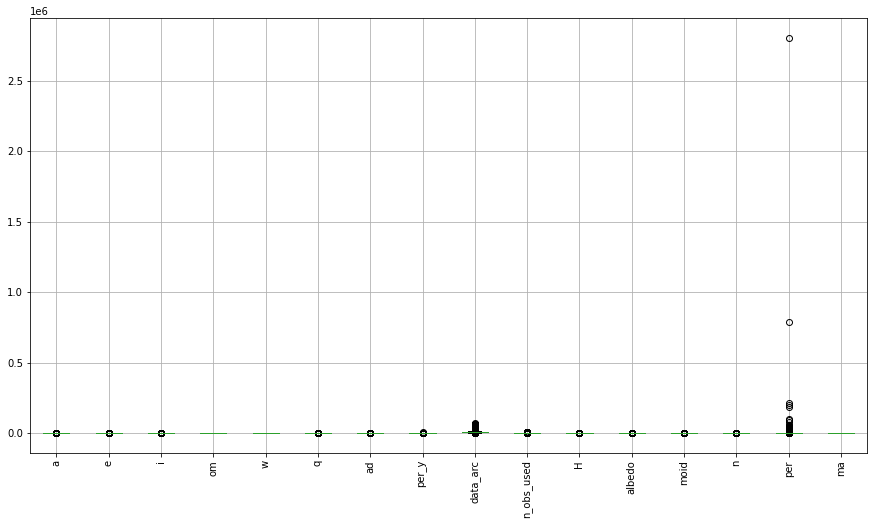

In [38]:
# Box Plot erzeugen
plt.figure(figsize=(15, 8))
X_train_orig[numeric_columns].boxplot(rot=90)

<AxesSubplot:>

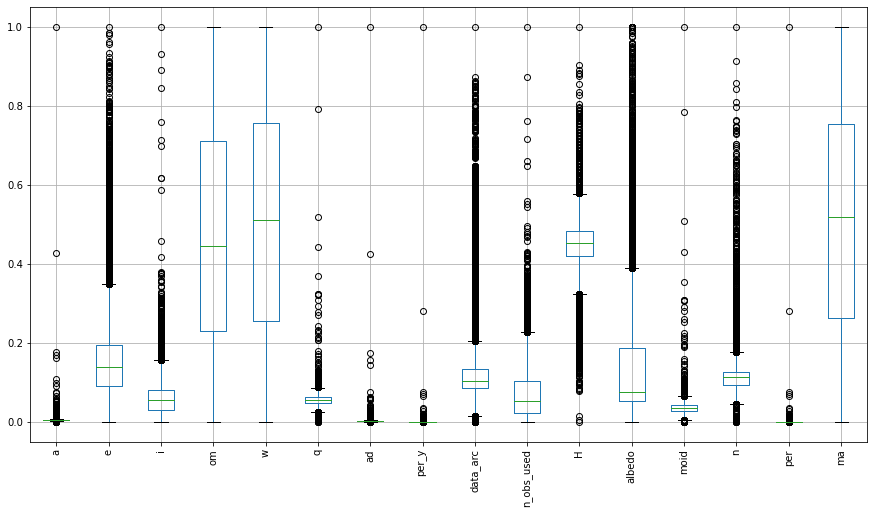

In [40]:
# numerische features skalieren
scaler = MinMaxScaler()
scaler.fit(X_train_orig[numeric_columns])
X_train_copy.loc[:, numeric_columns] = scaler.transform(X_train_orig[numeric_columns])

# Box Plot erzeugen
plt.figure(figsize=(15, 8))
X_train_copy.loc[:, numeric_columns].boxplot(rot=90)

#### Pipeline zusammenbauen

In [41]:
# pipeline zusammenbauen
ordinal_preprocessing = make_pipeline(ordinal_imputer, ordinal_encoder)
nominal_preprocessing = make_pipeline(nominal_imputer, nominal_encoder)
numeric_preprocessing = make_pipeline(numeric_imputer, scaler)

preprocessor = ColumnTransformer([
    ("ordinal_preprocessor", ordinal_preprocessing, ordinal_columns),
    ("nominal_preprocessor", nominal_preprocessing, nominal_columns),
    ("numeric_preprocessor", numeric_preprocessing, numeric_columns),
    ],
    remainder="drop"
)

# fitten
preprocessor.fit(X_train_orig)

# transformation anwenden
X_train_preprocessed = preprocessor.transform(X_train_orig)

### Zielvariable

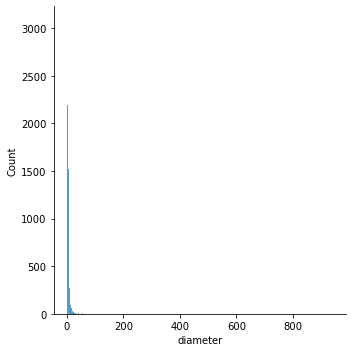

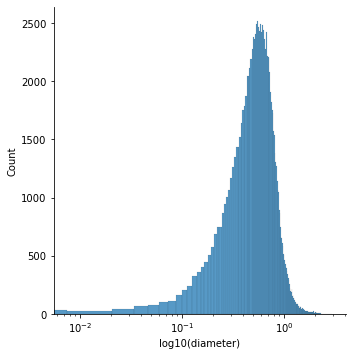

In [43]:
# logarithmische transformation der zielvariablen da werte zu groß
sns.displot(y_train_orig).set_xlabels("diameter")
sns.displot(y_train_transformed).set_xlabels("log10(diameter)")
plt.xscale('log')

Text(0, 0.5, 'diameter')

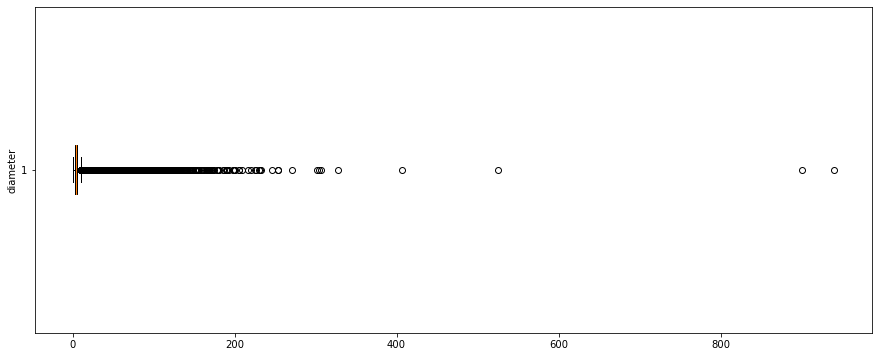

In [44]:
plt.figure(figsize=(15, 6))
plt.boxplot(y_train_orig, vert=False)
plt.ylabel("diameter")

Text(0, 0.5, 'log10(diameter)')

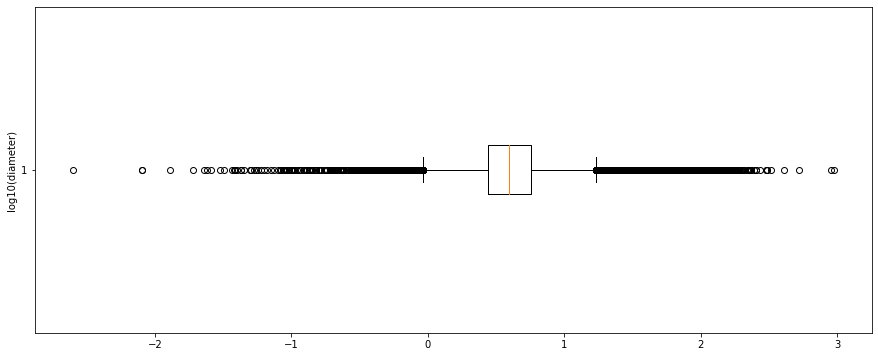

In [45]:
plt.figure(figsize=(15, 6))
plt.boxplot(y_train_transformed, vert=False)
plt.ylabel("log10(diameter)")

### Correlation Matrix

<AxesSubplot:>

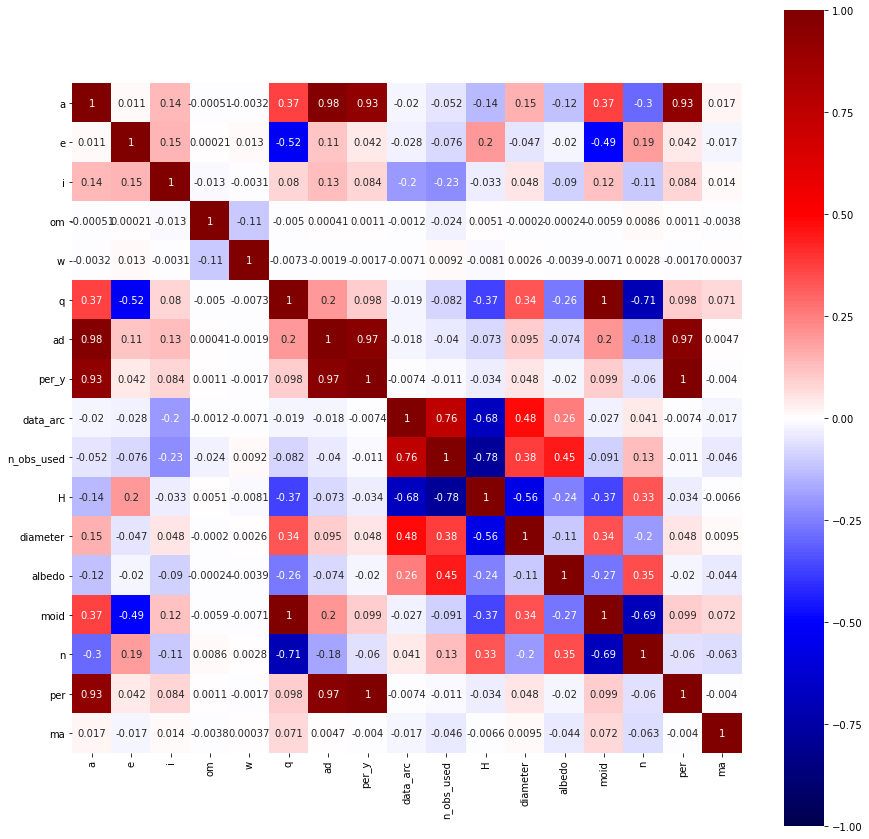

In [48]:
corrmat = data_train.corr()

fig = plt.figure(figsize=(15, 15))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap="seismic", annot=True)

In [49]:
k = 9
k_best_features = corrmat["diameter"].abs().nlargest(k)
k_best_features

diameter      1.000000
H             0.562898
data_arc      0.483138
n_obs_used    0.377380
moid          0.338259
q             0.335596
n             0.198972
a             0.151272
albedo        0.106501
Name: diameter, dtype: float64

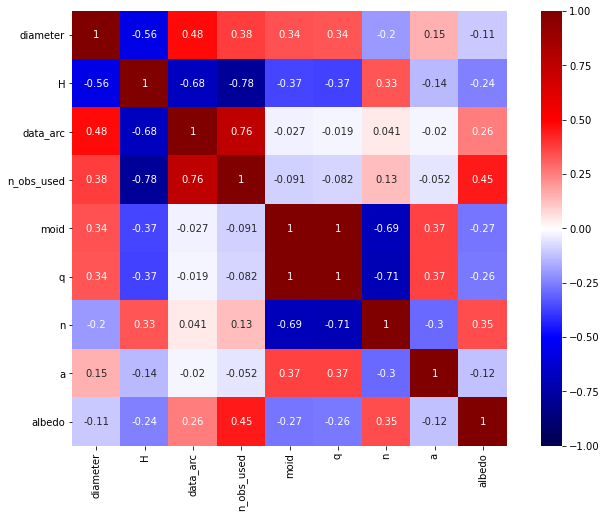

In [50]:
corrmat_k_best = data_train[k_best_features.index].corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corrmat_k_best, annot=True, vmax=1, vmin=-1, square=True, cmap="seismic");

### Pairplot

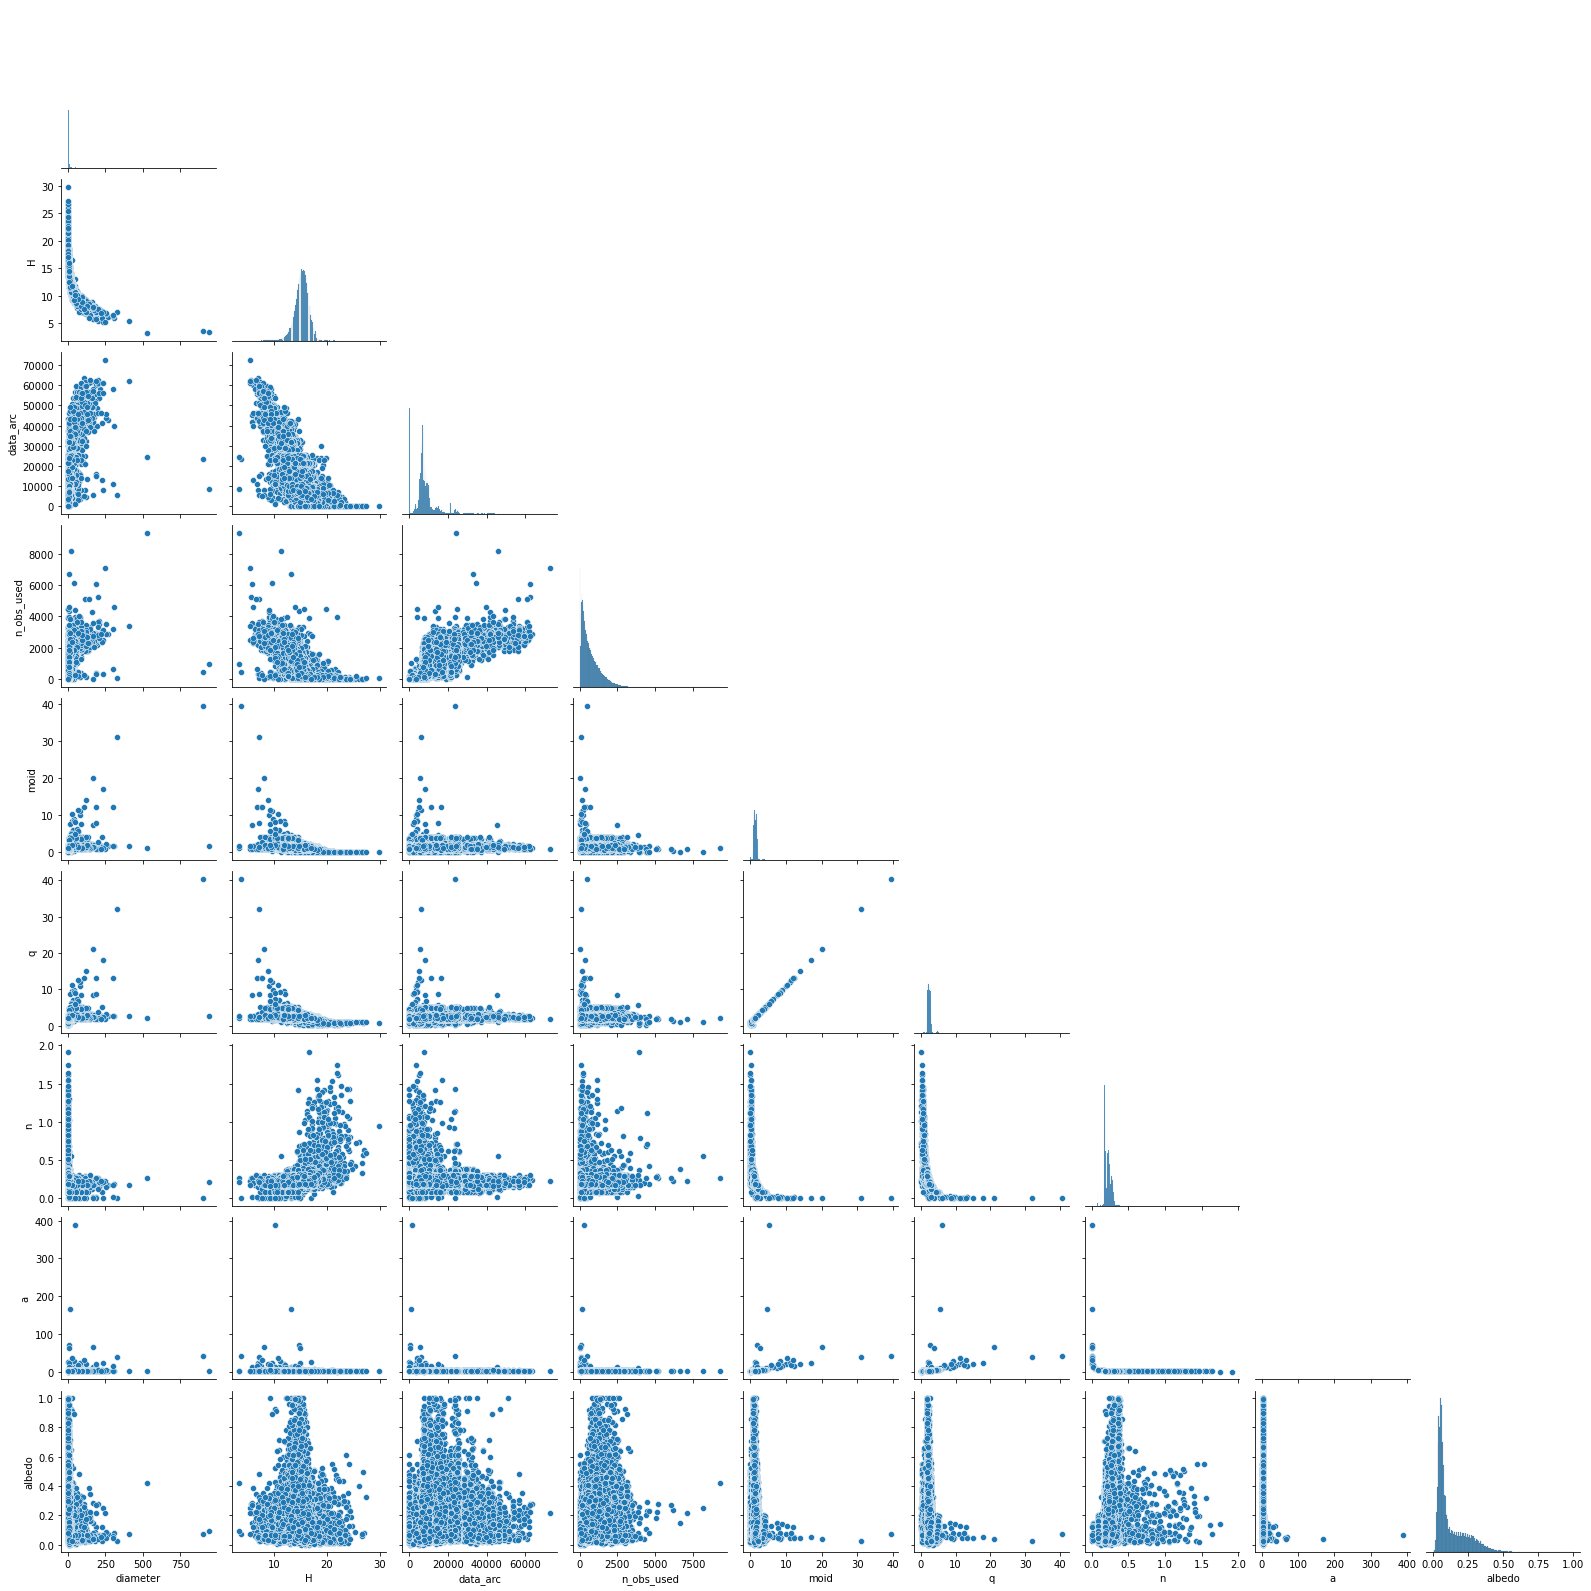

In [51]:
sns.pairplot(data_train[k_best_features.index], corner=True)
plt.show()

## Model bauen

### Trainings- und Validierungsdatensatz vorbereiten

X_train, X_valid, X_test - transformirte Daten


y_train, y_valid, y_test - logaritmisch transformiert

In [53]:
X_test = preprocessor.transform(X_test_orig)
y_test = y_test_transformed

In [54]:
# trenne in trainings und test daten
X_train, X_valid, y_train, y_valid = train_test_split(X_train_preprocessed, y_train_transformed, train_size=0.8, random_state=2)

In [55]:
y_train_km = np.power(10, y_train)
y_valid_km = np.power(10, y_valid)

In [56]:
print("--- Train ---")
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print()
print("--- Valid ---")
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)

--- Train ---
X_train:  (88086, 37)
y_train:  (88086,)

--- Valid ---
X_valid:  (22022, 37)
y_valid:  (22022,)


In [153]:
model_results = []

### Lineare Regression

#### Model trainieren

In [58]:
# model bauen
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [59]:
# Gewichte = Koeffizienten = coef_
print(lin_reg.coef_)

# Bias = Intercept = intercept_
print(lin_reg.intercept_)

[-4.06052840e-03  8.84214801e+10  4.16571266e+10 -5.29152314e+08
  6.27677884e+10  6.27677884e+10  4.72487991e+07 -1.97524003e+10
 -1.97524003e+10 -1.97524003e+10  2.70119532e+10 -1.97524003e+10
 -1.97524003e+10 -1.97524003e+10  2.70119532e+10  2.70119532e+10
 -1.97524003e+10 -1.97524003e+10 -7.03501767e+07  1.26876003e+05
  9.80200020e+07  7.52702515e+07  8.10406549e-02  2.66799405e-01
  7.23640782e-03 -2.65516826e-03 -3.91205750e+06 -7.47077656e+07
  6.19887697e+06  1.37729835e-01  3.73220611e-01 -4.24226315e+00
 -1.20677976e+00  2.11401416e+00 -4.25804042e-01 -6.19888336e+06
  4.48674201e-04]
-131436848619.75868


#### Model auswerten

In [60]:
# model auswerten
y_pred_train = lin_reg.predict(X_train)
y_pred_valid = lin_reg.predict(X_valid)

show_result("LinearRegression", y_train, y_pred_train, y_valid, y_pred_valid)

--- LinearRegression ---
RMSE Train = 0.069
RMSE Validierung = 0.071
---------------------------------
R2 Train = 0.937
R2 Validierung= 0.936


In [61]:
y_train.std()

0.2772234601651464

#### Generalisierungsfehler

In [154]:
y_pred_test = lin_reg.predict(X_test)

model_results.append(show_generalized_error("LinearRegression", y_test, y_pred_test))

--- LinearRegression ---
R2 Test = 0.939


### Feature Expansion

#### Model trainieren

In [66]:
quadratic_reg = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression(normalize=True)
)

quadratic_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression(normalize=True))])

In [68]:
# Koeffizienten untersuchen

print(quadratic_reg[1].coef_)
print(quadratic_reg[1].intercept_)

[ 3.71575501e+09 -1.15068152e+11  1.76705172e+10 -3.67789180e+12
  1.87846495e+11  1.14509365e+11  1.08001992e+13  4.12871031e+10
 -2.73935546e+10  1.02668234e+11 -1.11753437e+10  6.63775935e+10
 -2.33066910e+11 -5.59868919e+11 -1.63179872e+11 -2.49814071e+11
  3.61354708e+11 -4.00920893e+12  4.95896454e+12 -3.96733409e+12
  9.64984160e+12  1.38654689e+12  2.95026840e+10  6.45536883e+10
 -2.75046589e+10  2.09716058e+10  9.18131754e+11 -4.64411306e+12
  2.57377343e+12 -1.79916412e+11 -2.48145359e+10 -1.29787612e+11
 -1.64104851e+10  3.72601834e+11 -5.31982366e+11  6.34608368e+11
 -1.87643593e+10 -1.17381392e-03 -6.24614873e+08  2.56405946e+10
  2.06336898e+12 -1.86130794e+09 -1.86130794e+09  1.55125082e+11
 -1.24183836e+09 -1.24183836e+09 -1.24183836e+09 -2.75070479e+10
 -1.24183836e+09 -1.24183836e+09 -1.24183836e+09 -2.75070479e+10
 -2.75070479e+10 -1.04973950e+11  1.75333910e+11  3.44377359e+10
  6.21629783e+11 -3.84926824e+11 -4.60564510e+10  6.35013176e-03
 -1.36189440e-03  8.38222

#### Model auswerten

In [69]:
y_pred_train = quadratic_reg.predict(X_train)
y_pred_valid = quadratic_reg.predict(X_valid)
y_pred_test = quadratic_reg.predict(X_test)

show_result("LinearRegression (Feature Expansion)", y_train, y_pred_train, y_valid, y_pred_valid)

--- LinearRegression (Feature Expansion) ---
RMSE Train = 0.054
RMSE Validierung = 8369943904.53
---------------------------------
R2 Train = 0.963
R2 Validierung= -8.899067976653561e+20


!!! Test Fehler RMSE viel größer als Train Fehler RMSE --> OVERFITTING

### Ridge Regularisierung

#### Model trainieren

In [70]:
quadratic_reg_ridge= make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only = True),
    #RobustScaler
    Ridge(normalize=True) # alpha = 0.1
)

quadratic_reg_ridge.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('ridge', Ridge(normalize=True))])

#### Model auswerten

In [71]:
y_pred_train = quadratic_reg_ridge.predict(X_train)
y_pred_valid = quadratic_reg_ridge.predict(X_valid)
y_pred_test = quadratic_reg_ridge.predict(X_test)

show_result("Ridge", y_train, y_pred_train, y_valid, y_pred_valid)

--- Ridge ---
RMSE Train = 0.082
RMSE Validierung = 0.084
---------------------------------
R2 Train = 0.912
R2 Validierung= 0.911


#### Hyperparameter 'alpha' suchen

In [193]:
alphas = [0.0005, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 5.0]

rmse_train = []
rmse_valid = []
r2_train = []
r2_valid = []

print(datetime.now())

for alpha in alphas:
    print(alpha)
    model= make_pipeline(
        PolynomialFeatures(degree=2, include_bias=False, interaction_only = True),
        Ridge(normalize=True, alpha=alpha) # alpha = 0.1
    )
    
    model.fit(X_train, y_train)
    y_pred_train = np.power(10, model.predict(X_train))
    y_pred_valid = np.power(10, model.predict(X_valid))
    
    rmse_train.append(mean_squared_error(y_train_km, y_pred_train, squared=False))
    rmse_valid.append(mean_squared_error(y_valid_km, y_pred_valid, squared=False))  
    
    r2_train.append(r2_score(y_train_km, y_pred_train))
    r2_valid.append(r2_score(y_valid_km, y_pred_valid))
    
    
print(rmse_train)
print(rmse_valid)

print(r2_train)
print(r2_valid)

2021-07-01 19:03:08.111931
0.0005
0.001
0.003
0.01
0.03
0.1
0.3
1.0
3.0
5.0
[2.4870388309878537, 2.5919270819594566, 2.9729334746555676, 3.5094899654966154, 3.690402379066222, 4.182680089789066, 5.165910093351704, 10.66378241805482, 56.6335601520651, 116.58687391543607]
[123.72072783963637, 44.4550095427981, 8.637440451593358, 2.4467116640124362, 2.2352634451053808, 2.6950139685189223, 3.7821800812328292, 5.110987862252846, 5.850781097208384, 6.126112499416808]
[0.933712365905027, 0.9280032412177662, 0.9052808551084364, 0.8680056333595969, 0.8540463939147547, 0.8125106149796413, 0.7140032661068783, -0.21868070997374356, -33.372816017124386, -144.66885333234336]
[-203.5405560573646, -25.408024568753717, 0.003070075420656071, 0.9200055080590817, 0.9332345267961638, 0.9029453068646186, 0.8088479737673203, 0.6509366929449913, 0.5425725751806857, 0.49850750789826115]


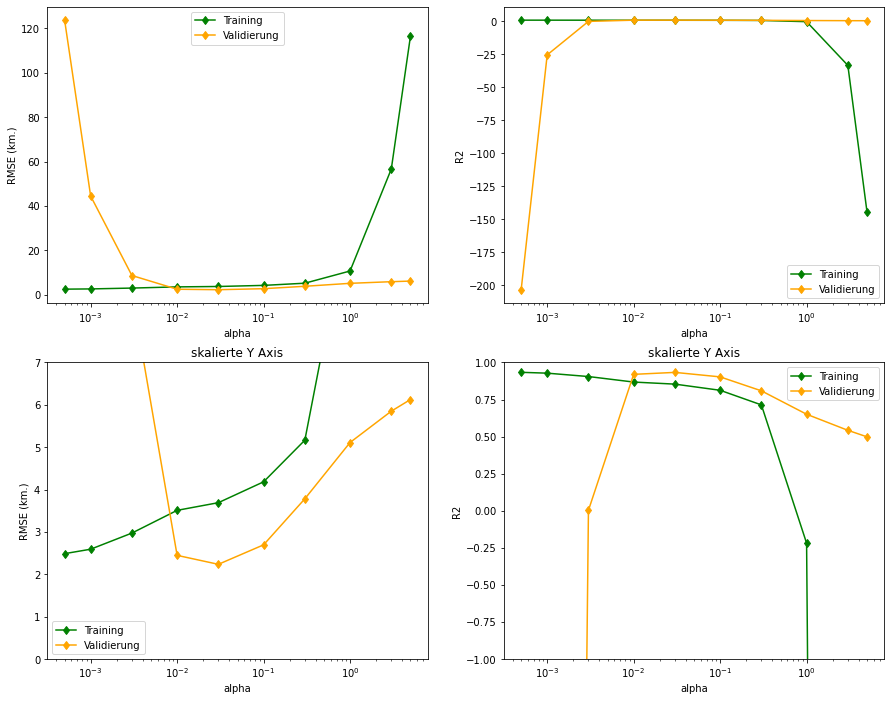

In [197]:
plt.figure(figsize=(15,12))
plt.subplot(2, 2, 1)
plt.plot(alphas, rmse_train, color = "green", label = "Training", marker="d")
plt.plot(alphas, rmse_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("alpha")
plt.ylabel("RMSE (km.)")
plt.xscale('log')
# plt.ylim((1.5, 7))
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(alphas, r2_train, color = "green", label = "Training", marker="d")
plt.plot(alphas, r2_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.xscale('log')
# plt.ylim((0.8, 1))
plt.legend()
#-------------------------------------------------------
plt.subplot(2, 2, 3)
plt.plot(alphas, rmse_train, color = "green", label = "Training", marker="d")
plt.plot(alphas, rmse_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("alpha")
plt.ylabel("RMSE (km.)")
plt.xscale('log')
plt.ylim((0, 7))
plt.title("skalierte Y Axis")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(alphas, r2_train, color = "green", label = "Training", marker="d")
plt.plot(alphas, r2_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("alpha")
plt.ylabel("R2")
plt.xscale('log')
plt.ylim((-1, 1))
plt.title("skalierte Y Axis")
plt.legend()

#### Generalisierungsfehler quadratische Ridge Model

In [155]:
quadratic_reg_ridge_best= make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False, interaction_only = True),
    Ridge(normalize=True, alpha=0.03)
)

quadratic_reg_ridge_best.fit(X_train_preprocessed, y_train_transformed)

y_pred_test = quadratic_reg_ridge_best.predict(X_test)

model_results.append(show_generalized_error("Ridge (degree=2)", y_test, y_pred_test))

--- Ridge (degree=2) ---
R2 Test = 0.948


#### Kreuzvalidierung

In [76]:
# TODO: Hilfsfunktion zum Erstellen einer polynomischen Regression
def get_regression(alpha=1.0, degree=2):
    model = make_pipeline(
            PolynomialFeatures(degree=degree, include_bias=False, interaction_only = True),
            Ridge(alpha=alpha, normalize=True)
            )
    return model

In [211]:
# Fitten des GridSearchCV Modells
alphas = [0.001, 0.003, 0.01, 0.03, 0.3, 1.0, 3.0]

ridge_regression = get_regression()

param_grid = {
    "ridge__alpha": alphas,
    "polynomialfeatures__degree": np.arange(1, 3)
}


ridge_gridsearch_hp_tuning = GridSearchCV(
        ridge_regression, # Basis-Modell
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=5,
        n_jobs=-1
)

ridge_gridsearch_hp_tuning.fit(X_train_preprocessed, y_train_transformed)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False,
                                                           interaction_only=True)),
                                       ('ridge', Ridge(normalize=True))]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([1, 2]),
                         'ridge__alpha': [0.001, 0.003, 0.01, 0.03, 0.3, 1.0,
                                          3.0]},
             scoring='neg_mean_squared_error')

In [212]:
print(ridge_gridsearch_hp_tuning.best_params_)
print("NMSE = ", ridge_gridsearch_hp_tuning.best_score_)

{'polynomialfeatures__degree': 1, 'ridge__alpha': 0.003}
NMSE =  -0.004939424977504792


In [213]:
gs_r_ridge = np.ndarray(buffer = ridge_gridsearch_hp_tuning.cv_results_['mean_test_score'], shape = (2, 7))
gs_r_ridge

array([[-0.00495318, -0.00493942, -0.00493989, -0.00507839, -0.00832405,
        -0.01649821, -0.03155297],
       [-0.0059221 , -0.00579026, -0.00560189, -0.00512775, -0.00537488,
        -0.00689844, -0.00993522]])

Text(0.5, 1.0, 'Ridge Grid Search NMSE')

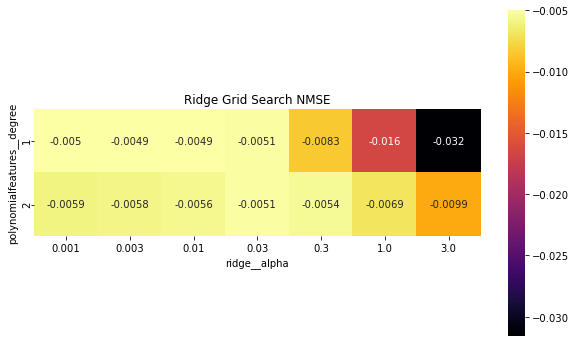

In [218]:
plt.figure(figsize=(10,6))
sns.heatmap(gs_r_ridge, annot=True, square=True, cmap="inferno")#, xticklabels=False, yticklabels=False)

plt.yticks(np.arange(1, 3) - 0.5, np.arange(1, 3), ha='center')
plt.xticks(np.arange(len(alphas)) +0.5, alphas, ha='center')

plt.ylabel("polynomialfeatures__degree")
plt.xlabel("ridge__alpha")

plt.title("Ridge Grid Search NMSE")

#### Generalisierungsfehler Ridge Model

In [156]:
ridge_model_best = Ridge(normalize=True, alpha=0.003)
ridge_model_best.fit(X_train_preprocessed, y_train_transformed)

y_pred_test = ridge_model_best.predict(X_test)

model_results.append(show_generalized_error("Ridge (degree=1)", y_test, y_pred_test))

--- Ridge (degree=1) ---
R2 Test = 0.939


#### Predict 'diameter'

In [81]:
data_ohne_diameter = data_ohne_diameter.loc[:, columns_for_analyze]
data_ohne_diameter.drop(columns = "diameter", inplace = True)
data_ohne_diameter.shape

(702078, 20)

In [82]:
data_ohne_diameter_preprocessed = preprocessor.transform(data_ohne_diameter)
data_ohne_diameter_preprocessed

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.18966404e-01, 4.96231991e-04, 3.73492810e-01],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.21921880e-01, 4.82585265e-04, 6.59961729e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.20000403e-01, 4.91381160e-04, 1.34213353e-01],
       ...,
       [9.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.40714561e-01, 4.09216225e-04, 9.87086502e-01],
       [9.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.51376533e-01, 3.75686408e-04, 4.25545536e-02],
       [9.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        1.26590041e-01, 4.62327741e-04, 5.67568660e-02]])

Mean 'diameter' = 7.515 km.
Std 'diameter' = 702.79 km.


<Figure size 720x576 with 0 Axes>

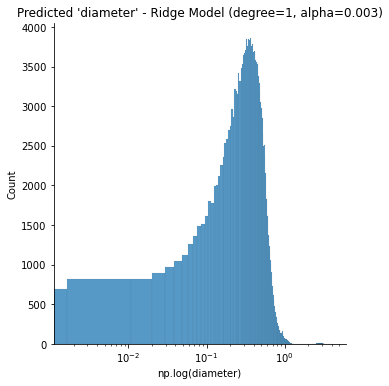

In [223]:
diameter_predicted = ridge_model_best.predict(data_ohne_diameter_preprocessed)

plot_predicted_diameter("Ridge Model (degree=1, alpha=0.003)", diameter_predicted)

In [87]:
int(len(diameter_predicted) * 0.2)

140415

### Random Forest

#### Model trainieren

In [88]:
# model bauen
random_forest = RandomForestRegressor(n_estimators=100, n_jobs=-1)  #max_depth
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [89]:
random_forest.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1821394381)

#### Model auswerten

In [90]:
# model auswerten

y_pred_train = random_forest.predict(X_train)
y_pred_valid = random_forest.predict(X_valid)

show_result("RandomForestRegressor", y_train, y_pred_train, y_valid, y_pred_valid)

--- RandomForestRegressor ---
RMSE Train = 0.017
RMSE Validierung = 0.046
---------------------------------
R2 Train = 0.996
R2 Validierung= 0.973


#### Hyperparameter 'n_estimators' suchen

In [91]:
trees_num = [10, 25, 50, 100, 150, 200]
depth = [1, 2, 3, 4, 5, 8, 10, 16]

In [92]:
rmse_train = []
rmse_valid = []
r2_train = []
r2_valid = []

print(datetime.now())


for n in trees_num:
    print(n)
    
    model = RandomForestRegressor(n_estimators=n, max_depth = 10,  n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred_train = np.power(10, model.predict(X_train))
    y_pred_valid = np.power(10, model.predict(X_valid))
    
    rmse_train.append(mean_squared_error(y_train_km, y_pred_train, squared=False))
    rmse_valid.append(mean_squared_error(y_valid_km, y_pred_valid, squared=False))  
    
    r2_train.append(r2_score(y_train_km, y_pred_train))
    r2_valid.append(r2_score(y_valid_km, y_pred_valid))
    
    
print(rmse_train)
print(rmse_valid)

print(r2_train)
print(r2_valid)

2021-07-01 17:22:58.638684
10
25
50
100
150
200
[2.1678252460161054, 1.5638953711870522, 1.6761436520966317, 1.5804045555971236, 1.325961696439594, 1.4496944991229272]
[1.1272092158982485, 1.0768312450633295, 1.0122588620154662, 1.0824045961081392, 1.0614704757938518, 1.0206237111750824]
[0.9496364974338937, 0.973789049219717, 0.9698914486882059, 0.9732327390864672, 0.9811578982944782, 0.97747730434111]
[0.9830213341423913, 0.9845050636482359, 0.986307659995077, 0.9843442544158933, 0.9849439746337884, 0.9860804303937281]


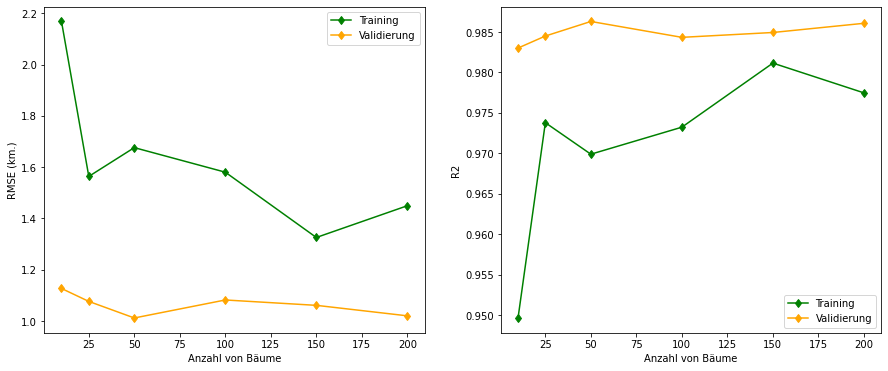

In [93]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(trees_num, rmse_train, color = "green", label = "Training", marker="d")
plt.plot(trees_num, rmse_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("Anzahl von Bäume")
plt.ylabel("RMSE (km.)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trees_num, r2_train, color = "green", label = "Training", marker="d")
plt.plot(trees_num, r2_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("Anzahl von Bäume")
plt.ylabel("R2")
plt.legend()

#### Hyperparameter 'max_depth' suchen

In [94]:
rmse_train = []
rmse_valid = []
r2_train = []
r2_valid = []

for d in depth:
    print(d)
    
    model = RandomForestRegressor(n_estimators=100, max_depth = d,  n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred_train = np.power(10, model.predict(X_train))
    y_pred_valid = np.power(10, model.predict(X_valid))
    
    rmse_train.append(mean_squared_error(y_train_km, y_pred_train, squared=False))
    rmse_valid.append(mean_squared_error(y_valid_km, y_pred_valid, squared=False))  
    
    r2_train.append(r2_score(y_train_km, y_pred_train))
    r2_valid.append(r2_score(y_valid_km, y_pred_valid))
    
print(rmse_train)
print(rmse_valid)

print(r2_train)
print(r2_valid)

1
2
3
4
5
8
10
16
[9.130760103903702, 7.7252266462383465, 6.096590424063436, 5.177548039356021, 4.220676031939469, 1.4619802531352581, 1.494542904809083, 1.3886835032237075]
[8.046277933239251, 6.349537299451234, 4.388161436015701, 3.1599775126946503, 2.223327205096094, 1.0808739763695352, 1.0397568176808334, 1.0728224671065176]
[0.10652737339740492, 0.3604274055016957, 0.6016714589088394, 0.7127132073673401, 0.8090887933048816, 0.9770939396924715, 0.976062204047357, 0.9793331665700175]
[0.13486365106001608, 0.46126070052448565, 0.7426882060544333, 0.8665672355237761, 0.9339456742239789, 0.9843885004406434, 0.9855536526402747, 0.9846202165818527]


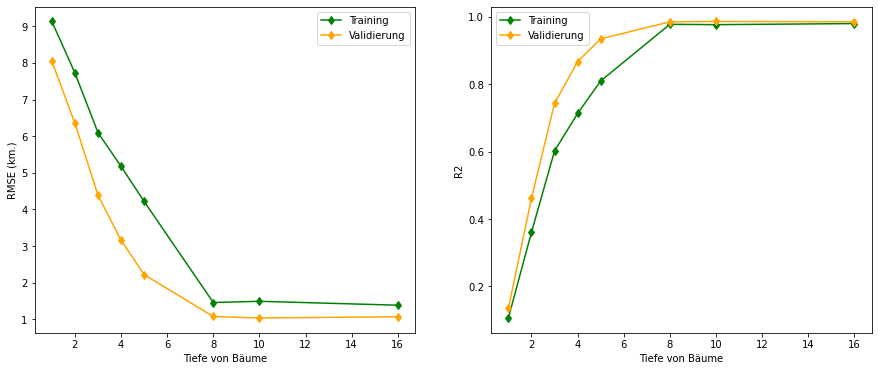

In [95]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(depth, rmse_train, color = "green", label = "Training", marker="d")
plt.plot(depth, rmse_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("Tiefe von Bäume")
plt.ylabel("RMSE (km.)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(depth, r2_train, color = "green", label = "Training", marker="d")
plt.plot(depth, r2_valid, color = "orange", label = "Validierung", marker="d")
plt.xlabel("Tiefe von Bäume")
plt.ylabel("R2")
plt.legend()

#### Kreuzvalidierung

In [96]:
param_grid = {
    "max_depth": depth,
    "n_estimators": trees_num
}


randomForest_gridsearch_hp_tuning = GridSearchCV(
        RandomForestRegressor(n_jobs=-1),
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        n_jobs=-1,
        verbose = 4
)

randomForest_gridsearch_hp_tuning.fit(X_train_preprocessed, y_train_transformed)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 8, 10, 16],
                         'n_estimators': [10, 25, 50, 100, 150, 200]},
             scoring='neg_mean_squared_error', verbose=4)

In [97]:
print(randomForest_gridsearch_hp_tuning.best_params_)
print("NMSE = ", randomForest_gridsearch_hp_tuning.best_score_)

{'max_depth': 16, 'n_estimators': 200}
NMSE =  -0.0020788558365731308


In [112]:
randomForest_gridsearch_hp_tuning.cv_results_

{'mean_fit_time': array([  1.87408098,   3.70904342,   5.93202607,  15.34724951,
         25.43603627,  29.29588652,   8.0496424 ,   9.33586939,
         12.98384825,  31.46490606,  48.05431199,  57.06051246,
         12.43034752,  16.65502898,  23.11378765,  47.4701604 ,
         73.9556098 ,  96.75389791,  16.38289833,  21.96048705,
         36.0034047 ,  70.20291766,  99.71967816, 120.59854499,
         17.80586648,  24.41926352,  38.81026077,  78.29142396,
        114.14949989, 142.03684131,  21.73268096,  33.33866477,
         52.86525313, 108.53914515, 156.95767172, 200.645998  ,
         24.59592946,  36.96086621,  64.53381451, 123.15567223,
        177.14333638, 223.51185099,  30.67520817,  48.10766506,
         80.92451207, 157.15881093, 220.69382437, 213.32911388]),
 'std_fit_time': array([ 1.4801031 ,  0.87819969,  0.23268372,  1.25913971,  0.70906506,
         1.94095971,  1.62645257,  0.20097144,  0.17429752,  0.58378268,
         0.37799234,  3.29446495,  2.0740888 ,  0.1

In [200]:
gs_r_rf = np.ndarray(buffer = randomForest_gridsearch_hp_tuning.cv_results_['mean_test_score'], shape = (8, 6))
gs_r_rf

array([[-0.04834444, -0.04786693, -0.04812083, -0.04794291, -0.04802297,
        -0.04797595],
       [-0.02942749, -0.03048892, -0.02974377, -0.02997054, -0.02989477,
        -0.02952273],
       [-0.0169162 , -0.01573431, -0.01579192, -0.01594589, -0.01582334,
        -0.01574595],
       [-0.00945272, -0.00903221, -0.00904004, -0.00891634, -0.00898978,
        -0.00881765],
       [-0.00570896, -0.00558244, -0.0055373 , -0.00550738, -0.0055279 ,
        -0.00550333],
       [-0.00263759, -0.00258044, -0.00256387, -0.00255904, -0.002538  ,
        -0.00254916],
       [-0.00228486, -0.00223669, -0.00221569, -0.00220244, -0.00219906,
        -0.00219887],
       [-0.00224675, -0.00214254, -0.00210309, -0.00209229, -0.00208186,
        -0.00207886]])

Text(0.5, 1.0, 'RandomForest Grid Search NMSE')

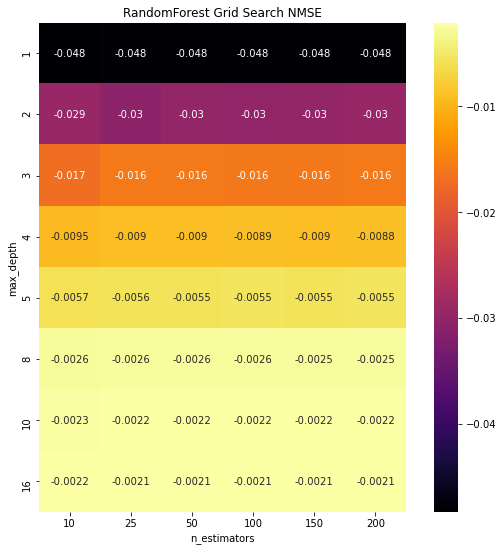

In [202]:
plt.figure(figsize=(10,9))
sns.heatmap(gs_r_rf, annot=True, square=True, cmap="inferno")#, xticklabels=False, yticklabels=False)

plt.yticks(np.arange(len(depth))+0.5, depth)
plt.xticks(np.arange(len(trees_num))+0.5, trees_num)

plt.ylabel("max_depth")
plt.xlabel("n_estimators")
plt.title("RandomForest Grid Search NMSE")

#### Generalisierungsfehler

In [160]:
random_forest_best = RandomForestRegressor(n_estimators=200, max_depth = 16,  n_jobs=-1)
random_forest_best.fit(X_train_preprocessed, y_train_transformed)


y_pred_test = random_forest_best.predict(X_test)

model_results.append(show_generalized_error("RandomForest", y_test, y_pred_test))

--- RandomForest ---
R2 Test = 0.975


#### Predict 'diameter'

Mean 'diameter' = 3.52 km.
Std 'diameter' = 15.615 km.


<Figure size 720x576 with 0 Axes>

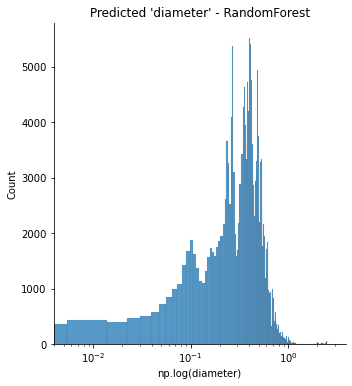

In [222]:
diameter_predicted = random_forest_best.predict(data_ohne_diameter_preprocessed)

plot_predicted_diameter("RandomForest", diameter_predicted)

#### Best Features suchen

In [120]:
with np.printoptions(precision=8, suppress=True, threshold=37):
    print(random_forest_best.feature_importances_)
    
# print(len(random_forest_best.feature_importances_))
# print(len(columns_for_analyze_preprocessed))

print(columns_for_analyze_preprocessed)

[0.00185243 0.00001092 0.00001347 0.         0.00000344 0.0000047
 0.         0.00003097 0.00002469 0.0000154  0.00000612 0.00002242
 0.00000187 0.00000011 0.000013   0.00000084 0.00000001 0.00000018
 0.         0.         0.         0.00065962 0.00123317 0.00226283
 0.00143975 0.00147517 0.00554609 0.00160415 0.00056715 0.00253543
 0.00236233 0.74254808 0.20442836 0.00668879 0.02198338 0.00057093
 0.00209419]
Index(['x0_N', 'x0_Y', 'x0_nan', 'x1_N', 'x1_Y', 'x1_nan', 'x2_MBA', 'x2_OMB',
       'x2_MCA', 'x2_AMO', 'x2_IMB', 'x2_TJN', 'x2_CEN', 'x2_APO', 'x2_ATE',
       'x2_AST', 'x2_TNO', 'x2_IEO', 'x2_HYA', 'x2_PAA', 'a', 'e', 'i', 'om',
       'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used',
       'H', 'albedo', 'moid', 'n', 'per', 'ma'],
      dtype='object')


In [109]:
random_forest_best.feature_importances_.shape

(37,)

In [121]:
with np.printoptions(precision=8, suppress=True, threshold=37):
    sorted_indexes = np.argsort(random_forest_best.feature_importances_)[::-1]
    
    print(f"--- große Koeffizienten ---")
    print(random_forest_best.feature_importances_[sorted_indexes])

best_features = columns_for_analyze_preprocessed[sorted_indexes]

print(f"--- best Features ---")
print(best_features)
print("--- Indexes ---")
print(sorted_indexes)

--- große Koeffizienten ---
[0.74254808 0.20442836 0.02198338 0.00668879 0.00554609 0.00253543
 0.00236233 0.00226283 0.00209419 0.00185243 0.00160415 0.00147517
 0.00143975 0.00123317 0.00065962 0.00057093 0.00056715 0.00003097
 0.00002469 0.00002242 0.0000154  0.00001347 0.000013   0.00001092
 0.00000612 0.0000047  0.00000344 0.00000187 0.00000084 0.00000018
 0.00000011 0.00000001 0.         0.         0.         0.
 0.        ]
--- best Features ---
Index(['H', 'albedo', 'n', 'moid', 'ad', 'condition_code', 'n_obs_used', 'om',
       'ma', 'x0_N', 'per_y', 'q', 'w', 'i', 'e', 'per', 'data_arc', 'x2_OMB',
       'x2_MCA', 'x2_TJN', 'x2_AMO', 'x0_nan', 'x2_ATE', 'x0_Y', 'x2_IMB',
       'x1_nan', 'x1_Y', 'x2_CEN', 'x2_AST', 'x2_IEO', 'x2_APO', 'x2_TNO',
       'x2_MBA', 'x1_N', 'x2_PAA', 'a', 'x2_HYA'],
      dtype='object')
--- Indexes ---
[31 32 34 33 26 29 30 23 36  0 27 25 24 22 21 35 28  7  8 11  9  2 14  1
 10  5  4 12 15 17 13 16  6  3 19 20 18]


### Gradient Boosting

#### Model trainieren

In [122]:
boosting_regressor = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3) # max_depth = 3
boosting_regressor.fit(X_train, y_train)

# model auswerten

y_pred_train = boosting_regressor.predict(X_train)
y_pred_valid = boosting_regressor.predict(X_valid)

show_result("GradientBoostingRegressor", y_train, y_pred_train, y_valid, y_pred_valid)

--- GradientBoostingRegressor ---
RMSE Train = 0.055
RMSE Validierung = 0.056
---------------------------------
R2 Train = 0.961
R2 Validierung= 0.96


#### Kreuzvalidierung 

##### für '5 best Features'

In [123]:
n = 5

sorted_indexes[2:n+2]

array([34, 33, 26, 29, 30], dtype=int64)

In [124]:
X_train[:, sorted_indexes[:n]].shape

(88086, 5)

In [125]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.8]
n_estimators = [10, 25, 50, 100, 150]

param_grid = {
    "learning_rate": learning_rates,
    "n_estimators": n_estimators
}


gradientBoosting_gridsearch_hp_tuning = GridSearchCV(
        GradientBoostingRegressor(),
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        n_jobs=-1,
        verbose = 4
)

gradientBoosting_gridsearch_hp_tuning.fit(X_train_preprocessed[:, sorted_indexes[:n]], y_train_transformed)
        

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.8],
                         'n_estimators': [10, 25, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=4)

In [126]:
print(gradientBoosting_gridsearch_hp_tuning.best_params_)
print("NMSE = ", gradientBoosting_gridsearch_hp_tuning.best_score_)


{'learning_rate': 0.5, 'n_estimators': 150}
NMSE =  -0.002567173572328237


In [127]:
gradientBoosting_gridsearch_hp_tuning.cv_results_

{'mean_fit_time': array([ 2.21432082,  5.88658683, 11.02016242, 24.24078886, 34.93640947,
         2.23955067,  5.64339161, 10.60079757, 21.10512948, 32.25350094,
         2.10213097,  5.25990955, 10.85000523, 21.58033148, 32.24122278,
         2.10641042,  5.35018897, 10.3712825 , 21.7825044 , 31.56413515,
         2.19971053,  5.48975722, 10.41324457, 19.20451164, 21.49333684]),
 'std_fit_time': array([0.10107987, 0.37712308, 0.253693  , 1.02032218, 1.54696745,
        0.02352948, 0.23538816, 0.2659432 , 0.33611689, 0.48190469,
        0.0195561 , 0.00685961, 0.40806296, 0.84147551, 0.89016895,
        0.01450879, 0.11317682, 0.14994652, 0.07914136, 0.56431107,
        0.10446169, 0.19918699, 0.14423198, 1.60887511, 1.11514499]),
 'mean_score_time': array([0.0144132 , 0.03697832, 0.05163558, 0.09547822, 0.16290633,
        0.01366019, 0.0290734 , 0.05444511, 0.10429255, 0.14801669,
        0.01365972, 0.02687947, 0.04504164, 0.0818975 , 0.11980851,
        0.01071397, 0.02398594, 0.0

In [128]:
gs_r = np.ndarray(buffer = gradientBoosting_gridsearch_hp_tuning.cv_results_['mean_test_score'], shape = (5, 5))
gs_r

array([[-0.07608218, -0.07444956, -0.07183363, -0.06691822, -0.06238283],
       [-0.0668574 , -0.05424705, -0.03854601, -0.02065115, -0.01219519],
       [-0.01970174, -0.00573348, -0.00321646, -0.00279076, -0.00268359],
       [-0.00440357, -0.00329364, -0.0028927 , -0.00265538, -0.00256717],
       [-0.00450676, -0.00348763, -0.00295767, -0.00271219, -0.00266787]])

Text(0.5, 1.0, 'Gradient Boosting Grid Search NMSE')

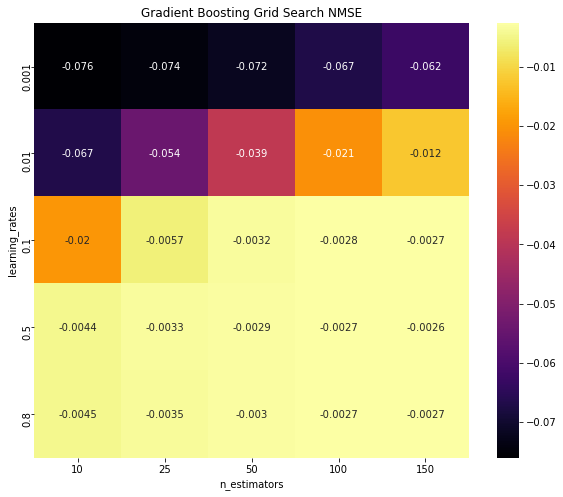

In [203]:
plt.figure(figsize=(10,8))
sns.heatmap(gs_r, annot=True, square=True, cmap="inferno")#, xticklabels=False, yticklabels=False)

plt.yticks(np.arange(len(learning_rates)) +0.5, learning_rates, ha='center')
plt.xticks(np.arange(len(n_estimators)) +0.5, n_estimators, ha='center')

plt.ylabel("learning_rates")
plt.xlabel("n_estimators")

plt.title("Gradient Boosting Grid Search NMSE")

In [ ]:
np.arange(len(learning_rates))

##### ohne H und albedo

In [130]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 0.8]
n_estimators = [10, 25, 50, 100, 150]

param_grid = {
    "learning_rate": learning_rates,
    "n_estimators": n_estimators
}


gradientBoosting_gridsearch_hp_tuning = GridSearchCV(
        GradientBoostingRegressor(),
        param_grid=param_grid,
        scoring="neg_mean_squared_error",
        cv=3,
        n_jobs=-1,
        verbose = 4
)

gradientBoosting_gridsearch_hp_tuning.fit(X_train_preprocessed[:, sorted_indexes[2:n+2]], y_train_transformed)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5, 0.8],
                         'n_estimators': [10, 25, 50, 100, 150]},
             scoring='neg_mean_squared_error', verbose=4)

In [131]:
print(gradientBoosting_gridsearch_hp_tuning.best_params_)
print("NMSE = ", gradientBoosting_gridsearch_hp_tuning.best_score_)

{'learning_rate': 0.5, 'n_estimators': 150}
NMSE =  -0.016397200291246795


#### Generalisierungsfehler

##### 5 Best Features

In [158]:
boosting_regressor_5f_best = GradientBoostingRegressor(n_estimators=150, learning_rate=0.5) # max_depth = 3
boosting_regressor_5f_best.fit(X_train_preprocessed[:, sorted_indexes[:n]], y_train_transformed)

y_pred_test = boosting_regressor_5f_best.predict(X_test[:, sorted_indexes[:n]])

model_results.append(show_generalized_error(f"GradientBoosting\n{n} best Features", y_test, y_pred_test))

--- GradientBoosting
5 best Features ---
R2 Test = 0.969


##### '5 best Features' ohne H und albedo

https://cneos.jpl.nasa.gov/tools/ast_size_est.html

The expression for **diameter d** in km as a function of **absolute magnitude H** and geometric **albedo a** is given by the following equation.

$$d = 10^{ [3.1236 - 0.5 log_{ 10 }(a) - 0.2H] }$$

In [172]:
boosting_regressor_without_h_albedo_best = GradientBoostingRegressor(n_estimators=150, learning_rate=0.5) # max_depth = 3
boosting_regressor_without_h_albedo_best.fit(X_train_preprocessed[:, sorted_indexes[2:n+2]], y_train_transformed)

y_pred_test = boosting_regressor_without_h_albedo_best.predict(X_test[:, sorted_indexes[2:n+2]])

model_results.append(show_generalized_error(f"GradientBoosting\n{n} best Features\n(without 'H', 'albedo')", y_test, y_pred_test))

--- GradientBoosting
5 best Features
(without 'H', 'albedo') ---
R2 Test = 0.794


#### Predict 'diameter' 5 Best Features

Mean 'diameter' = 3.442 km.
Std 'diameter' = 15.357 km.


<Figure size 720x576 with 0 Axes>

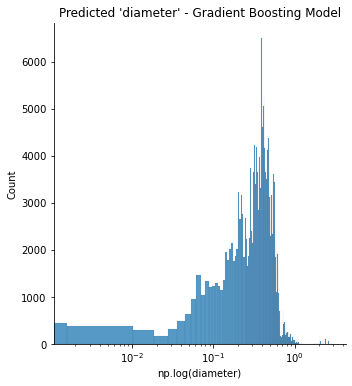

In [224]:
diameter_predicted = boosting_regressor_5f_best.predict(data_ohne_diameter_preprocessed[:, sorted_indexes[:n]])

plot_predicted_diameter("Gradient Boosting Model", diameter_predicted)

#### Predict 'diameter' 5 Best Features ohne 'H' und 'albedo'

Mean 'diameter' = 3.962 km.
Std 'diameter' = 20.558 km.


<Figure size 720x576 with 0 Axes>

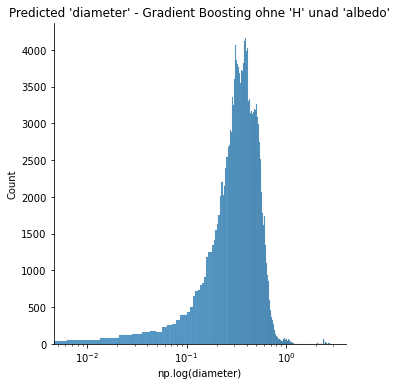

In [225]:
diameter_predicted = boosting_regressor_without_h_albedo_best.predict(data_ohne_diameter_preprocessed[:, sorted_indexes[2:n+2]])

plot_predicted_diameter("Gradient Boosting ohne 'H' unad 'albedo'", diameter_predicted)

### Modellvergleich

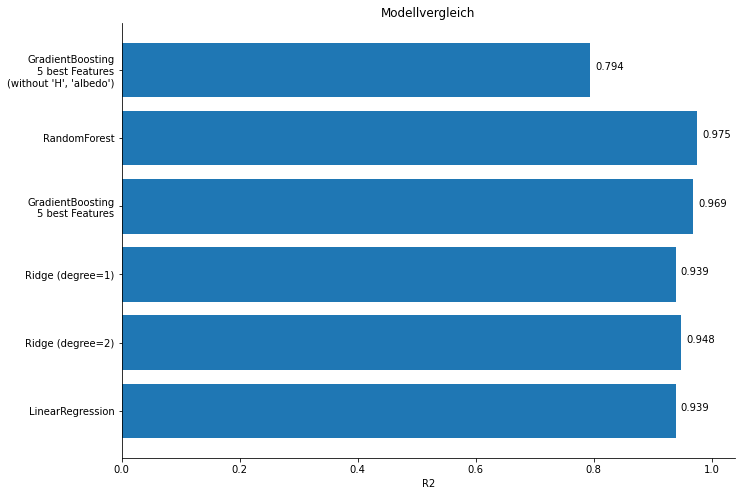

In [190]:
model_names = [x[0] for x in model_results]
r2_results = [x[1] for x in model_results]

fig, ax = plt.subplots(figsize=(11, 8))

my_barplot = plt.barh(y = model_names, width=r2_results)

plt.xlabel("R2")
plt.xlim((0, 1.04))
plt.title("Modellvergleich")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for balken in my_barplot:
    width = balken.get_width()
    plt.annotate(text='{:.3f}'.format(width),
                xy=(width, balken.get_y() + balken.get_height() / 2),
                xytext=(5, 0),                                         
                textcoords="offset points",
                ha='left')

In [173]:
model_results

[('LinearRegression', 0.939),
 ('Ridge (degree=2)', 0.948),
 ('Ridge (degree=1)', 0.939),
 ('GradientBoosting\n5 best Features', 0.969),
 ('RandomForest', 0.975),
 ("GradientBoosting\n5 best Features\n(without 'H', 'albedo')", 0.794)]

# Unsupervised learning

### PCA

In [230]:
pca_model = PCA()
pca_model.fit(X_train_preprocessed)
pca_model.explained_variance_

array([3.82883073e+00, 1.16260533e-01, 9.08283316e-02, 8.26854051e-02,
       7.33728740e-02, 2.28520868e-02, 1.64021245e-02, 1.48467979e-02,
       7.64567509e-03, 5.19584571e-03, 4.99412404e-03, 2.96691535e-03,
       2.76480256e-03, 1.76465137e-03, 1.68594829e-03, 1.24922128e-03,
       9.71385239e-04, 5.20486338e-04, 3.81136430e-04, 1.37390895e-04,
       1.17983101e-04, 6.14631150e-05, 3.17761888e-05, 1.47989748e-05,
       2.33906895e-07, 1.69969484e-07, 9.99917977e-29, 1.31762242e-29,
       6.55502499e-30, 1.54665473e-30, 3.82101670e-32, 3.82101670e-32,
       3.82101670e-32, 3.82101670e-32, 3.82101670e-32, 3.82101670e-32,
       3.82101670e-32])

Text(0, 0.5, 'Explained Variance')

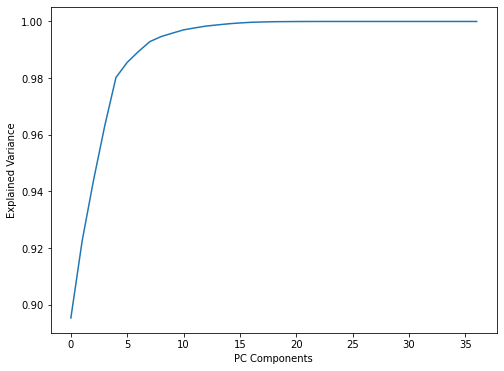

In [231]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca_model.explained_variance_ratio_))


plt.xlabel("PC Components")
plt.ylabel("Explained Variance")

In [232]:
pca_model_90 = PCA(n_components=0.90)
pca_model_90.fit(X_train_preprocessed)

X_train_auto_reduced = pca_model_90.transform(X_train_preprocessed)
X_train_auto_reduced.shape

(110108, 2)

In [233]:
#Löschen H und Albedo, id = (31, 32)
X_train_ohne_H_albedo = np.delete(X_train_preprocessed, np.s_[31:33], axis = 1)
X_train_ohne_H_albedo.shape

(110108, 35)

(110108, 2)


Text(0, 0.5, 'Component 1')

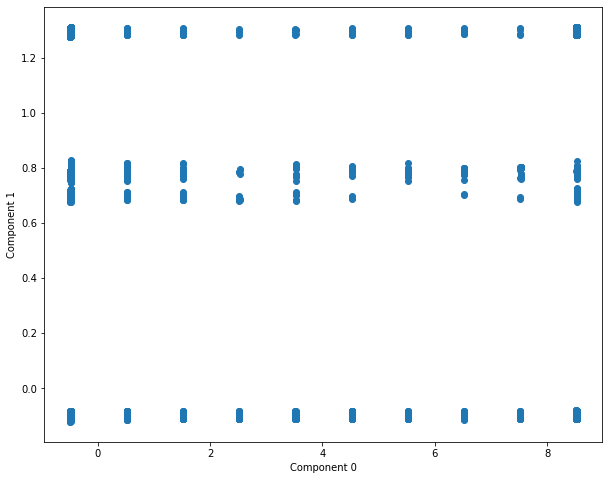

In [240]:
pca_model_90 = PCA(n_components=0.9)
pca_model_90.fit(X_train_ohne_H_albedo)

X_train_auto_reduced = pca_model_90.transform(X_train_ohne_H_albedo)
print(X_train_auto_reduced.shape)

plt.figure(figsize=(10,8))

plt.scatter(X_train_auto_reduced[:, 0], X_train_auto_reduced[:, 1])

plt.xlabel("Component 0")
plt.ylabel("Component 1")

Text(0.5, 0, 'PC3')

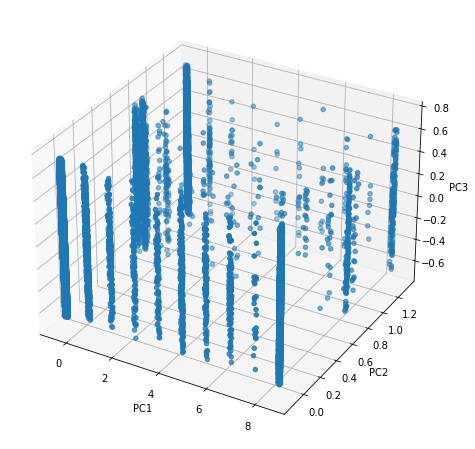

In [241]:
pca_model_90 = PCA(n_components=3)
pca_model_90.fit(X_train_ohne_H_albedo)

X_train_auto_reduced = pca_model_90.transform(X_train_ohne_H_albedo)


fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

scat = ax.scatter(
    X_train_auto_reduced[:, 0],
    X_train_auto_reduced[:, 1],
    X_train_auto_reduced[:, 2],
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
